# LAB1886 TASK UPDATE
***

I was very disappointed with the outcome of my work connected to the task you gave me. I tried a lot to get the algorithm running and was so focused on getting it to work that I did not have time in the end to really present which steps I took to improve the outcome of my predictive model. As mentioned in the interview, I do not have a lot of experience in running these sort of algorithms, which is why I was often doubting my implementation and was checking it several times. But I wanted to understand what went wrong so I also tried other algorithms like a random forest. This instantly produced better results, but they were still not good enough. So I decided to really overfit my NN and let it train for over 8 hours but with no real improvement, neither for training nor validation loss. 

Then I decided to get rid of the entity embeddings and returned to simple one-hot-encodings using sci-kit learn preprocessing tools. This also did not bring any major improvements. Using mean absolute error for the loss function I still got an overall loss of 4. In the context of bike rentals, this translates to an average that was off 4 bike rentals on a specifc station, year and weekday. 

So I decided to get back to the feature engineering and generate more features out of the date column. In the beginning, I did not do that to be quicker in testing the algorithm.

So I took the following featues:
- Year
- Month
- Week
- Day of Week
- Day of Month
- Hour

Immediately, I was getting a much better result. My validation error was less than 1, as was my training error. The algorithm now trained for about 20 minutes and the validation error is down to 0.66 and the training error is at 0.46 and still decreasing. I think engineering more features like 
- using the location of the stations
- perhaps also additional features from the Date column like season
- using the weather information

might further improve the algorithm. 

### Imports and setting PATH variable

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd

from model import *
from prepare_data import *
from train_and_test import *

from IPython.core.display import display, HTML

Using TensorFlow backend.


In [3]:
PATH = 'dataset/'
table_names = ['station', 'trip']

### Feature Engineeering

The files are processed in *prepare_data.py*. The file provides the functions *load_data* and *generate_features* to prepare the input for the Neural Network.

In [4]:
_ , trip = load_data(PATH, table_names)
trip = generate_features(trip)

We rearrange the data

In [5]:
train_data_X = trip[['Station', 'Year', 'Month', 'Week', 'DayOfWeek', 'DayOfMonth', 'Hour']]
train_data_y = trip[['trip_count']]
train_data_X = train_data_X.apply(preprocessing.LabelEncoder().fit_transform)

and save it to the hdd:

In [6]:
train_data_X.to_pickle('tmp/train_data_X.pickle')
train_data_y.to_pickle('tmp/train_data_y.pickle')

### Prediction

We start by reloading the data from before. 

In [7]:
X = pd.read_pickle('tmp/train_data_X.pickle').values
y = pd.read_pickle('tmp/train_data_y.pickle').values

In [8]:
train_ratio = 0.9
train_size = int(train_ratio * len(X))

X_train = X[:train_size]
X_val = X[train_size:]
y_train = y[:train_size]
y_val = y[train_size:]
pd.DataFrame(y_val).to_csv('tmp/y_val.csv')

In [9]:
model_NNwEE = NNwEE(X_train, y_train, X_val, y_val, epochs_given=200)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 191)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              192000    
_________________________________________________________________
activation_1 (Activation)    (None, 1000)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
activation_2 (Activation)    (None, 1000)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
__________

/home/sg/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:331: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/home/sg/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:331: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/home/sg/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:331: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, Deprecati

Train on 132481 samples, validate on 14721 samples
Epoch 1/200
132481/132481 [==============================] - 6s 49us/step - loss: 0.6642 - val_loss: 0.7680

Epoch 00001: val_loss improved from inf to 0.76795, saving model to weights/model_weights.hdf5
Epoch 2/200
132481/132481 [==============================] - 5s 41us/step - loss: 0.6168 - val_loss: 0.7614

Epoch 00002: val_loss improved from 0.76795 to 0.76143, saving model to weights/model_weights.hdf5
Epoch 3/200
132481/132481 [==============================] - 6s 42us/step - loss: 0.6006 - val_loss: 0.6907

Epoch 00003: val_loss improved from 0.76143 to 0.69071, saving model to weights/model_weights.hdf5
Epoch 4/200
 34560/132481 [======>.......................] - ETA: 3s - loss: 0.5929

KeyboardInterrupt: 

<img src="img/loss.png" alt="Drawing" style="width: 400px;"/> 

### Conclusion

The regression is now doing much better than before according to the *mean-absolute-error*. Looking at the confusion matrix also shows, that the algorithm works much better in general. As we have seen in the histogram of my first submission, 1 is by far the value with the highest absolute frequency, followed by 2 and so forth.

In [10]:
y_pred = pd.read_csv('tmp/y_pred.csv').values

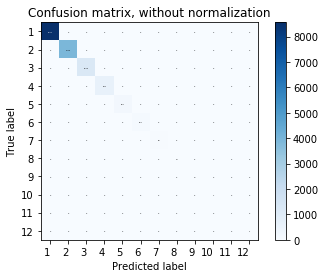

In [11]:
_ = plot_confusion_matrix(y_val, y_val)